In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

Change file path



In [5]:
data=pd.read_csv('C:/Users/moham/Desktop/Data Mining and ML/df_arabica_clean.csv')

In [6]:
data.head() # Display the top five rows of the DataFrame


,ID,Country of Origin,Altitude,Region,Number of Bags,Bag Weight,Harvest Year,Grading Date,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Moisture Percentage,Balance,Overall,Total Cup Points (TO BE RECALCULATED),Category One Defects,Category Two Defects
0,0,Colombia,1700-1930,"Piendamo,Cauca",1,35 kg,2021 / 2022,"September 21st, 2022",Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,11.8,8.42,8.58,89.33,0,3
1,1,Taiwan,1200,Chiayi,1,80 kg,2021 / 2022,"November 15th, 2022",Washed / Wet,8.50,8.50,7.92,8.00,7.92,10.5,8.25,8.50,87.58,0,0
2,2,Laos,1300,Laos Borofen Plateau,19,25 kg,2021 / 2022,"November 15th, 2022",Semi Washed,8.33,8.42,8.08,8.17,7.92,10.4,8.17,8.33,87.42,0,2
3,3,Costa Rica,1900,"Los Santos,Tarrazu",1,22 kg,2022,"September 21st, 2022",Washed / Wet,8.08,8.17,8.17,8.25,8.17,11.8,8.08,8.25,87.17,0,0
4,4,Colombia,1850-2100,"Popayan,Cauca",2,24 kg,2022,"March 6th, 2023","Honey,Mossto",8.33,8.33,8.08,8.25,7.92,11.6,7.92,8.25,87.08,0,2


In [7]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
data.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     207 non-null    int64  
 1   Country of Origin                      207 non-null    object 
 2   Altitude                               206 non-null    object 
 3   Region                                 205 non-null    object 
 4   Number of Bags                         207 non-null    int64  
 5   Bag Weight                             207 non-null    object 
 6   Harvest Year                           207 non-null    object 
 7   Grading Date                           207 non-null    object 
 8   Processing Method                      202 non-null    object 
 9   Aroma                                  207 non-null    float64
 10  Flavor                                 207 non-null    float64
 11  Aftert

In [8]:
data["Country of Origin"].value_counts() 

Taiwan                          61
Guatemala                       21
Colombia                        19
Honduras                        13
Thailand                        12
Ethiopia                        11
Brazil                          10
Costa Rica                       8
Nicaragua                        7
El Salvador                      7
Tanzania, United Republic Of     6
United States (Hawaii)           5
Mexico                           4
Peru                             4
Vietnam                          4
Uganda                           3
Indonesia                        3
Laos                             3
Panama                           2
Kenya                            2
Madagascar                       1
Myanmar                          1
Name: Country of Origin, dtype: int64

In [9]:
#This method shows a statistical summary of the numerical attributes 
data.describe() 

,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Moisture Percentage,Balance,Overall,Total Cup Points (TO BE RECALCULATED),Category One Defects,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,10.735266,7.644058,7.676812,83.706570,0.135266,2.251208
std,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,1.247468,0.256299,0.306359,1.730417,0.592070,2.950183
min,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,0.000000,6.670000,6.670000,78.000000,0.000000,0.000000
25%,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,10.100000,7.500000,7.500000,82.580000,0.000000,0.000000
50%,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,10.800000,7.670000,7.670000,83.750000,0.000000,1.000000
75%,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,11.500000,7.790000,7.920000,84.830000,0.000000,3.000000
max,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,13.500000,8.420000,8.580000,89.330000,5.000000,16.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored 

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

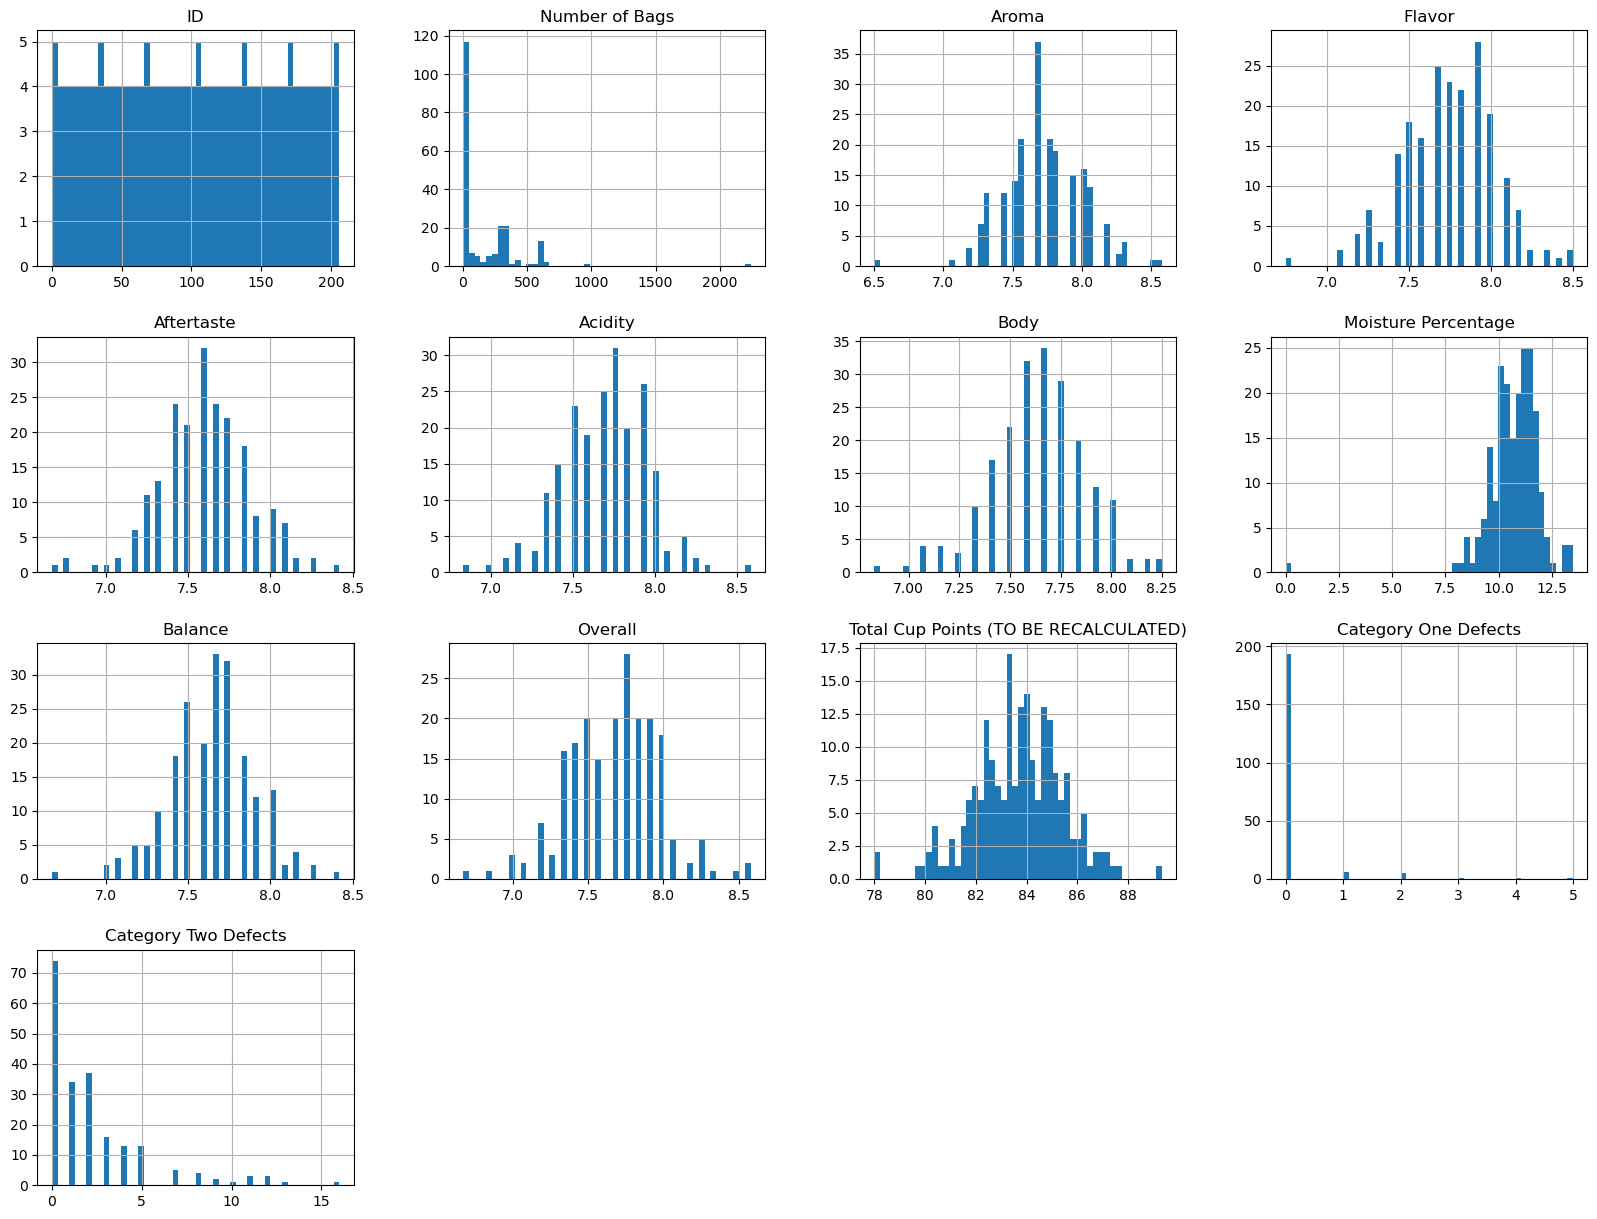

In [10]:
#To plot a histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

# Visualizing Data

<Axes: xlabel='Overall', ylabel='Moisture Percentage'>

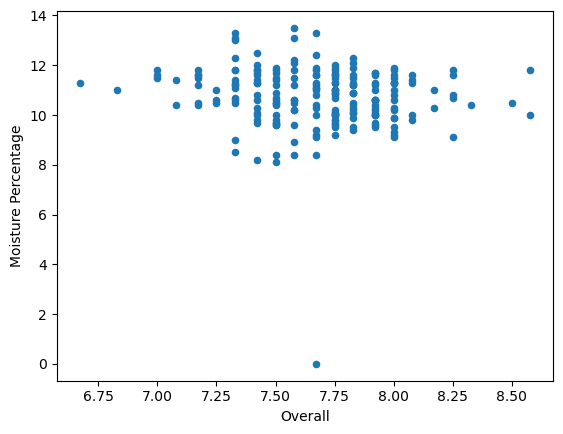

In [24]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
data.plot(kind="scatter", x="Overall", y="Moisture Percentage")


<Axes: xlabel='Overall', ylabel='Flavor'>

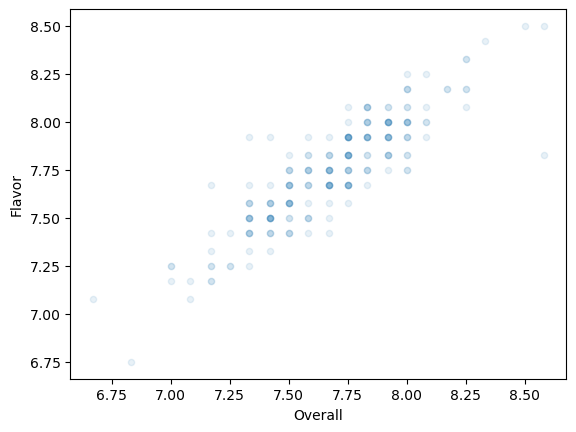

In [27]:
data.plot(kind="scatter", x="Overall", y="Flavor", alpha=0.1)